In [ ]:
"""

SR University, Warangal, India.
Nural-Networks & Deep-Learning - Professional Elective - 2.
Mentor - V.Venkatramana, EEE department.
Assignment - 3
18K41A0564 

"""


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

In [11]:
data = pd.read_excel("/unioncarbide.xls")
data.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       34 non-null     float64
 1   Y       34 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 672.0 bytes


In [13]:
d=np.abs(stats.zscore(data))
print(d)

[[0.12500664 0.25847285]
 [1.13696519 0.56778404]
 [1.08934361 0.58597881]
 [0.32739835 0.8225109 ]
 [0.52979006 0.51319971]
 [0.27977677 0.00374598]
 [0.73218177 1.3501594 ]
 [0.68456019 0.85890045]
 [1.13696519 0.01444879]
 [0.32739835 0.85890045]
 [0.8869519  1.31376985]
 [1.3393569  1.02265344]
 [0.73218177 2.16892432]
 [0.27977677 0.6876555 ]
 [0.73218177 0.39653909]
 [0.68456019 1.12433013]
 [1.69651874 1.10613535]
 [1.13696519 1.22279597]
 [1.08934361 1.07723776]
 [0.48216848 0.22208329]
 [0.12500664 0.25847285]
 [2.30369386 0.07652509]
 [0.93457348 0.17820178]
 [0.48216848 1.63378385]
 [0.8869519  1.57919952]
 [0.07738507 0.5420973 ]
 [1.49412703 1.96128982]
 [0.52979006 0.32375998]
 [0.73218177 1.21530401]
 [1.69651874 1.72475773]
 [0.27977677 0.07652509]
 [1.94653203 0.46931819]
 [1.13696519 0.71334225]
 [0.73218177 1.01516147]]


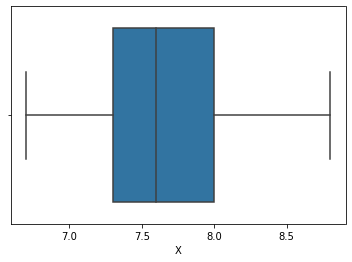

In [14]:
sns.boxplot(x=data['X'])

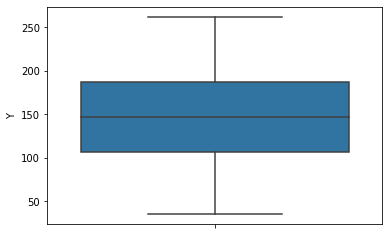

In [15]:
sns.boxplot(y=data['Y'])

In [16]:
f_data = data[(d<3).all(axis=1)]
f_data.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [17]:
df = data
for i in df:
    q = df[i].quantile(0.99)
    df[df[i] < q]
    q_low = df[i].quantile(0.01)
    q_hi  = df[i].quantile(0.99)

    df_filtered = df[(df[i] < q_hi) & (df[i] > q_low)]
df_filtered.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [18]:
data = df_filtered
print(len(data))
print(len(df_filtered))
if(len(data) == len(df_filtered)):
    print('No outliners')

32
32
No outliners


In [19]:
data_n = data.copy()
data_n = (data_n - data_n.min())/(data_n.max() - data_n.min())
data_n.head()

,X,Y
0,0.428571,0.644970
1,0.190476,0.745562
2,0.714286,0.751479
3,0.380952,0.828402
4,0.333333,0.727811


In [20]:
train_data,test_data = train_test_split(data_n,test_size=0.1)

In [21]:
print(len(train_data))
train_data.head()

28


,X,Y
22,0.238095,0.502959
15,0.619048,0.195266
33,0.285714,0.230769
5,0.523810,0.562130
32,0.190476,0.792899


In [22]:
dtx=np.array(train_data['X'])
dty=np.array(train_data['Y'])

In [23]:
from sympy import * 
#step-1
m0=1
c0=-1
epochs=100
learningrate=0.1

#step-2
x=Symbol('x')
y=Symbol('y')
m=Symbol('m')
c=Symbol('c')
E=(0.5)*(y-(m*x)-c)**2
fx=x**2+y**2+10
Em=E.diff(m)
Ec=E.diff(c)
err=[]
for itr in range(0,epochs):  #step-7
 er=0
 for s in range(0,len(dtx)): #step-6
  er+=((dty[s]-(m0*dtx[s])-c0))**2
  #step-3
  dfEm=Em.subs(m,m0)
  dfEm=dfEm.subs(c,c0) 
  dfEm=dfEm.subs(x,dtx[s]) 
  dfEm=dfEm.subs(y,dty[s])
  dfEm=round(dfEm,2)
  dfEc=Ec.subs(m,m0)
  dfEc=dfEc.subs(c,c0) 
  dfEc=dfEc.subs(x,dtx[s]) 
  dfEc=dfEc.subs(y,dty[s])
  dfEc=round(dfEc,2)
  #step-4
  cm=(-1.0)*learningrate*dfEm
  cc=(-1.0)*learningrate*dfEc
 
  #step-5
  m0=m0+cm
  c0=c0+cc
  m0=round(m0,2)
  c0=round(c0,2)
  er = (1/(2*len(train_data['X'])))*(er)
  err.append(er)
#step-7
print('Minimum value is at m=',m0)
print('Minimum value is at c=',c0)

Minimum value is at m= -0.12
Minimum value is at c= 0.59


In [24]:
train_data_pred=m0*train_data['X']+c0

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(train_data['Y'],train_data_pred)
mse

0.07992877526380317

Text(0.5, 1.0, 'predicted vs actual(Data)')

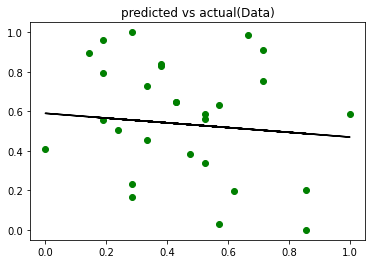

In [34]:
plt.plot(np.array(train_data['X']),np.array(train_data_pred),'black')
plt.scatter(np.array(train_data['X']),np.array(train_data['Y']),color='green')
plt.title('predicted vs actual(Data)')

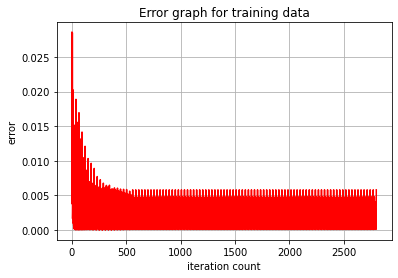

In [33]:
iters = np.arange(epochs*len(dtx))
plt.plot(iters,err,'red')
plt.title("Error graph for training data")
plt.xlabel("iteration count")
plt.ylabel("error")
plt.grid()

In [27]:
test_data_pred = m0 *test_data['X'] + c0
mse2 = mean_squared_error(test_data['Y'],test_data_pred)
mse2

0.09162425736041462

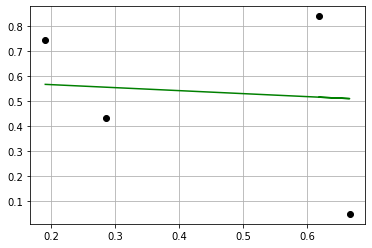

In [28]:
plt.scatter(test_data['X'],test_data['Y'],color='black')
plt.plot(test_data['X'],test_data_pred,'green')
plt.grid()

In [29]:
x_min = data['X'].min()
x_max = data['X'].max()
y_min = data['Y'].min()
y_max = data['Y'].max()

In [32]:
x =x1 = float(input("enter pH value:"))
x = (x - x_min)/(x_max - x_min)
y = m0*x + c0
y = y*(y_max - y_min) + y_min
print(f"bicarbonates of well water based on its pH {x1} is : {y}")

enter pH value:5
bicarbonates of well water based on its pH 5.0 is : 164.100068591890
